# Hands-on Practice for Module 1: Exploratory Data Analysis

### 0.Importing important packages

In [1]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn import datasets
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            

### 1. Loading data, determining samples, attributes, and types of attributes

Use Davis dataset avaialble at the url https://www.rdocumentation.org/packages/car/versions/2.1-6/topics/Davis
    
Description of the data is provided at https://www.rdocumentation.org/packages/car/versions/2.1-6/topics/Davis

Drop rows in the data set with missing values (NA), using dropna(inplace=True) function.

<span style="color:red">**Question 1a:** </span> What does the data capture? <br>

<span style="color:green">Answer:</span> Data captures four properties (Sex, Weigth, Height, Reported weight and reported height) of men and women engaged in regular exercise.

<span style="color:red">**Question 1b:** </span> Who are selected as subjects in the study that collected the data? <br>

<span style="color:green">Answer:</span> Total 200 subjects are selected as subjects who are men and women engaged in regular exercises.

In [2]:
davis_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv')

In [3]:
davis_df.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


<span style="color:red">**Question 1c:** </span> How many data points are in this dataset? <br>

In [4]:
davis_df.shape

(200, 6)

 <span style="color:green">Answer:</span> 200

In [5]:
#davis_df.dropna(inplace=True);

<span style="color:red">**Question 1d:** </span> How many attributes are in this dataset? <br>

 <span style="color:green">Answer:</span> 6

<span style="color:red">**Question 1e:** </span> What type of attributes are present in the dataset? <br> 
       

In [6]:
davis_df.dtypes

Unnamed: 0      int64
sex            object
weight          int64
height          int64
repwt         float64
repht         float64
dtype: object

<span style="color:green">Answer:</span> Numerical(Integer: weight and height, Continuous), Categorical(Sex: M or F)

### 2. Generating summary statistics

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

In [7]:
davis_df.drop(columns=davis_df.columns[davis_df.columns.str.contains('unnamed', case=False)], inplace=True)
davis_df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


<span style="color:red">**Question 2a:** </span> What are range of values the numeric attributes take? <br> 
[Hint: Use exclude=object option in describe() function to ignore the attribute sex]

In [8]:
davis_df.describe(exclude=object)

,weight,height,repwt,repht
count,200.000000,200.000000,183.000000,183.000000
mean,65.800000,170.020000,65.622951,168.497268
std,15.095009,12.007937,13.776669,9.467048
min,39.000000,57.000000,41.000000,148.000000
25%,55.000000,164.000000,55.000000,160.500000
50%,63.000000,169.500000,63.000000,168.000000
75%,74.000000,177.250000,73.500000,175.000000
max,166.000000,197.000000,124.000000,200.000000


 <span style="color:green">Answer:</span> Weight: 39 - 166
 Height: 57 - 197
 repwt: 41 - 124
 repht: 148 - 200

<span style="color:red">**Question 2b:** </span> What different values do categorical attributes take? <br> 
[Hint: Use include=object option in describe() function to ignore the attribute sex]

In [9]:
davis_df.describe(include=object)

,sex
count,200
unique,2
top,F
freq,112


 <span style="color:green">Answer:</span> Sex: M and F

<span style="color:red">**Question 2c:** </span> What are the mean values for each of the numeric attributes? <br> 

In [10]:
from pandas.api.types import is_numeric_dtype
print("Mean for each attributes is:")
for col in davis_df.columns:
    if is_numeric_dtype(davis_df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % davis_df[col].mean())

Mean for each attributes is:
weight:
	 Mean = 65.80
height:
	 Mean = 170.02
repwt:
	 Mean = 65.62
repht:
	 Mean = 168.50


<span style="color:red">**Question 2d:** </span> What is the variance for each of the numeric attributes? <br> 

In [11]:
from pandas.api.types import is_numeric_dtype
print("Variance for the attributes is:")
for col in davis_df.columns:
    if is_numeric_dtype(davis_df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % davis_df[col].var())

Variance for the attributes is:
weight:
	 Mean = 227.86
height:
	 Mean = 144.19
repwt:
	 Mean = 189.80
repht:
	 Mean = 89.62


<span style="color:red">**Question 2e:** </span> Visually examine how the attribute weight is distributed and comment if the data is Normally distributed? 

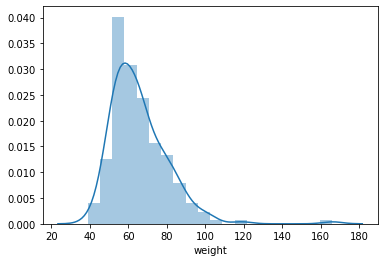

In [12]:
sns.distplot(davis_df['weight']);

 <span style="color:green">Answer:</span> Yes, by the plot, the data looks like it is normally distributed.

<span style="color:red">**Question 2f:** </span> Visually examine how the attribute height is distributed and comment if the data is Normally distributed? 

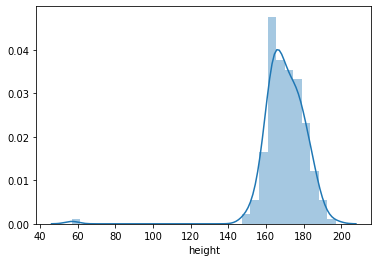

In [13]:
sns.distplot(davis_df['height']);

 <span style="color:green">Answer:</span> Yes, the data is normally distributed.

<span style="color:red">**Question 2g:** </span> Visually examine how the attribute repwt is distributed and comment if the data is Normally distributed? 

In [14]:
davis_df.dropna(inplace=True);

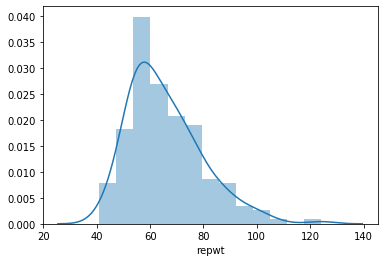

In [15]:
sns.distplot(davis_df['repwt']);

 <span style="color:green">Answer:</span> Yes the data is normally distributed.

<span style="color:red">**Question 2h:** </span> Visually examine how the attribute repht is distributed and comment if the data is Normally distributed? 

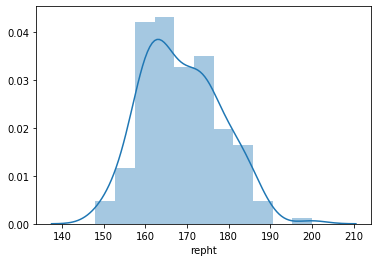

In [16]:
sns.distplot(davis_df['repht']);

 <span style="color:green">Answer:</span>  No, the data is not normally distributed.

<span style="color:red">**Question 2i:** </span> Visually examine how the attribute sex is distributed and comment if the data is uniformly distributed? 

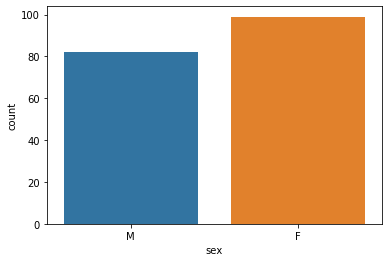

In [17]:
sns.countplot(davis_df['sex']);

 <span style="color:green">Answer:</span>   No, the counts in the bar graph is not equal. So the data is not unifromly distributed.

### 3. Geometric and Probabilistic view

For this part, we will restrict to repwt and repht attributes in the davis dataset as we can only visualize 2D space.

In [18]:
davis_df.dropna(inplace=True)

In [19]:
davis_df_new = davis_df[['repwt','repht']]

In [20]:
davis_df_new.head()

,repwt,repht
0,77.0,180.0
1,51.0,159.0
2,54.0,158.0
3,70.0,175.0
4,59.0,155.0


<span style="color:red">**Question 3a:** </span> Show the Geometric view of this new row normalized data on a 2D space along with the mean. 

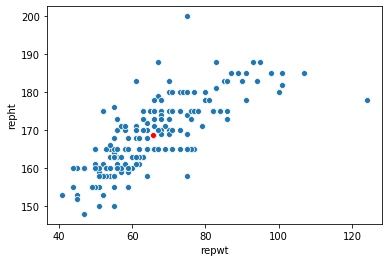

In [21]:
fig, ax = plt.subplots()
sns.scatterplot(x='repwt',y='repht',data=davis_df_new,ax=ax)
mu = np.mean(davis_df_new.values,0)
sns.scatterplot(x=[mu[0], mu[0]],y=[mu[1], mu[1]],color='r',ax=ax)

We will further normalize the magnitude of each row in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_row_norm.

In [22]:
from sklearn.preprocessing import normalize
davis_d_new_row_norm = normalize(davis_df_new, axis=1, norm='l2')

In [23]:
davis_d_new_row_norm[1:10,:]

array([[0.30542755, 0.95221532],
       [0.32340548, 0.94626048],
       [0.37139068, 0.92847669],
       [0.35574458, 0.93458322],
       [0.41835989, 0.90828134],
       [0.42288547, 0.90618314],
       [0.37582461, 0.92669081],
       [0.37595091, 0.92663958],
       [0.35232976, 0.93587592]])

<span style="color:red">**Question 3b:** </span> Show the Geometric view of this new row normalized data on a 2D space along with the mean. Comment on the Geomateric view of the data in comparison to the view you observed in Question 3a. Provide a reason for the difference in the geometric views in Question 3a and 3b.

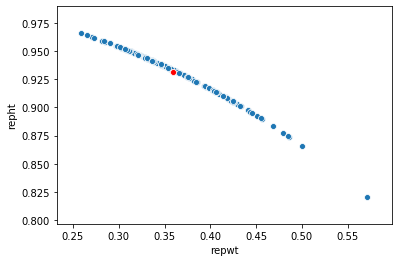

In [24]:
davis_df_new_row_norm = pd.DataFrame(davis_d_new_row_norm, columns=("repwt","repht")) 
fig, ax = plt.subplots()
sns.scatterplot(x='repwt',y='repht',data=davis_df_new_row_norm,ax=ax)
mu = np.mean(davis_df_new_row_norm.values,0)
sns.scatterplot(x=[mu[0], mu[0]],y=[mu[1], mu[1]],color='r',ax=ax)

 <span style="color:green">Answer:</span> The data consists of attributes with different ranges. So the data needs to be normalised to bring them on similar scale. In 3a, The axes are in ranges of repwt(40-124),repht(148-200). The ranges are scaled in 3b, so that the data is normalised. So the plot seen in 3b is in linear shape. 

<span style="color:red">**Question 3c:** </span> Show the Probabilistic view of the data davis_df_new.

In [25]:
from scipy.stats import multivariate_normal

mu = np.mean(davis_df_new.values,0)
Sigma = np.cov(davis_df_new.values.transpose())

min_length = np.min(davis_df_new.values[:,0]);
min_width = np.min(davis_df_new.values[:,1]);
max_length = np.max(davis_df_new.values[:,0]);
max_width = np.max(davis_df_new.values[:,1]);
x, y = np.mgrid[min_length:max_length:50j, min_width:max_width:50j]

positions = np.empty(x.shape + (2,))
positions[:, :, 0] = x; 
positions[:, :, 1] = y

F = multivariate_normal(mu, Sigma)
Z = F.pdf(positions)


Text(0.5, 1.0, 'Probabilistic view')

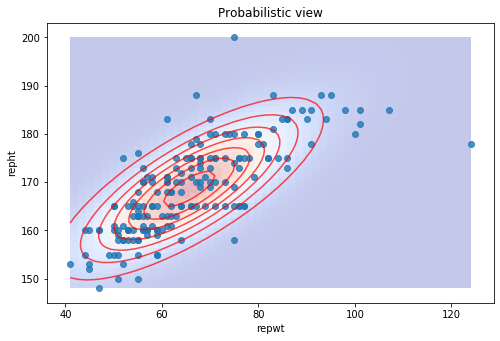

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[min_length,max_length, min_width,max_width], alpha=0.3)
cset = ax.contour(x, y, Z, colors='r', alpha=0.7)
plt.scatter(davis_df_new.values[:,0],davis_df_new.values[:,1],alpha=0.8)
ax.set_xlabel('repwt')
ax.set_ylabel('repht')
plt.title('Probabilistic view')

We will normalize the magnitude of each column in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_col_norm.

In [27]:
davis_df_new_col_norm = normalize(davis_df_new, axis=0, norm='l2')

In [28]:
davis_df_new_col_norm[1:10,:]

array([[0.05648398, 0.06996539],
       [0.05980657, 0.06952536],
       [0.07752703, 0.07700594],
       [0.06534421, 0.06820526],
       [0.08417221, 0.0726056 ],
       [0.08527974, 0.0726056 ],
       [0.08084962, 0.07920611],
       [0.07863456, 0.07700594],
       [0.07088186, 0.07480577]])

<span style="color:red">**Question 3d:** </span> Show the Probabilistic view of the data davis_df_new_col_norm. Compare the shape of the covariance structure in the Gaussian distribution with that of Question 3c and comment if column normalization has affected the shape of the covariance structure.

In [29]:
davis_df_new_col_norm = pd.DataFrame(davis_df_new_col_norm, columns=("repwt","repht")) #convert numpy array to dataframe

from scipy.stats import multivariate_normal

mu = np.mean(davis_df_new_col_norm.values,0)
Sigma = np.cov(davis_df_new_col_norm.values.transpose())

min_length = np.min(davis_df_new_col_norm.values[:,0]);
min_width = np.min(davis_df_new_col_norm.values[:,1]);
max_length = np.max(davis_df_new_col_norm.values[:,0]);
max_width = np.max(davis_df_new_col_norm.values[:,1]);
x, y = np.mgrid[min_length:max_length:50j, min_width:max_width:50j]

positions = np.empty(x.shape + (2,))
positions[:, :, 0] = x; 
positions[:, :, 1] = y

F = multivariate_normal(mu, Sigma)
Z = F.pdf(positions)


Text(0.5, 1.0, 'Probabilistic view')

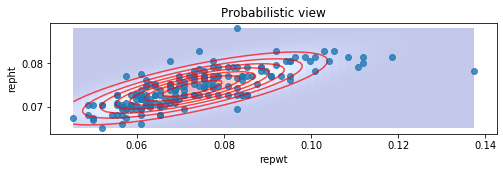

In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[min_length,max_length, min_width,max_width], alpha=0.3)
cset = ax.contour(x, y, Z, colors='r', alpha=0.7)
plt.scatter(davis_df_new_col_norm.values[:,0],davis_df_new_col_norm.values[:,1],alpha=0.8)
ax.set_xlabel('repwt')
ax.set_ylabel('repht')
plt.title('Probabilistic view')

<span style="color:green">Answer:</span> The shape of covariance structure in the gaussian distribution is reduced compared to question 3c. In the above figure y-axis is reduced a lot compared to 3c. But the covariance struicture seems to be same, the guassian distribution is not much changed compared to 3c, only the shape has been reduced.

### 4. Understanding the (in)dependencies among attributes using Covariance matrix

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

<span style="color:red">**Question 4a:** </span> What is the covariance matrix?

In [31]:
data = davis_df.values[:,1:5]
data[1:10,:]

array([[58, 161, 51.0, 159.0],
       [53, 161, 54.0, 158.0],
       [68, 177, 70.0, 175.0],
       [59, 157, 59.0, 155.0],
       [76, 170, 76.0, 165.0],
       [76, 167, 77.0, 165.0],
       [69, 186, 73.0, 180.0],
       [71, 178, 71.0, 175.0],
       [65, 171, 64.0, 170.0]], dtype=object)

In [32]:
def mycov(data, col_a, col_b):
    mu = np.mean(data, axis=0) #compute mean
    print(mu)
    sum = 0;
    for i in range(0, len(data)):
        sum += ((data[i,col_a] - mu[col_a]) * (data[i,col_b] - mu[col_b]))

    return sum/(len(data)-1)
#print([mycov(data,0,0), mycov(data,0,1), mycov(data,0,2), mycov(data,0,3)])
print('Covariance Matrix:')
davis_df.cov()

Covariance Matrix:


,weight,height,repwt,repht
weight,235.346041,29.136065,177.292357,91.004665
height,29.136065,151.587047,102.833180,85.497729
repwt,177.292357,102.833180,191.385635,99.017403
repht,91.004665,85.497729,99.017403,88.259791


<span style="color:red">**Question 4b:** </span> Which pairs of attributes co-vary in the opposite direction?

<span style="color:green">Answer: </span> None



<span style="color:red">**Question 4c:** </span> Which pairs of attributes are highly correlated?

In [33]:
print('Correlation Matrix:')
davis_df.corr()

Correlation Matrix:


,weight,height,repwt,repht
weight,1.000000,0.154258,0.835376,0.631435
height,0.154258,1.000000,0.603737,0.739166
repwt,0.835376,0.603737,1.000000,0.761860
repht,0.631435,0.739166,0.761860,1.000000


<span style="color:green">Answer: </span> Decreasing order of correlation: [weight, repwt] ;  [repht, repwt]; [height, repht];  [weight, repht]; [height, repwt]; [weight, height]

Highest Correlation:  [weight, repwt].

<span style="color:red">**Question 4d:** </span> Which pairs of attributes are uncorrelated?

<span style="color:green">Answer:</span> Least Correlation:  [weight, height].

<span style="color:red">**Question 4e:** </span> What information did you gather from a correlation matrix that is not available in a covariance matrix?

<span style="color:green">Answer:</span> The correlation between the same feature is same i.e, 1. It cannot be shown in covariance matrix.

### 5. Dimensionality Reduction: Feature Selection

**Data:** Iris dataset from the practice notebook. (https://raw.githubusercontent.com/plotly/datasets/master/iris.csv)

**Assumption:** Assume that your goal is to cluster the data to identify the species 'Name'. Clustering algorithm takes as input data points and attributes. It groups points that are similar to each other into a separate cluster. It puts points that are dissimilar in different cluster. Note that the 'Name' attribute will be hidden from the clustering algorithm.

In [34]:
import seaborn as sns
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


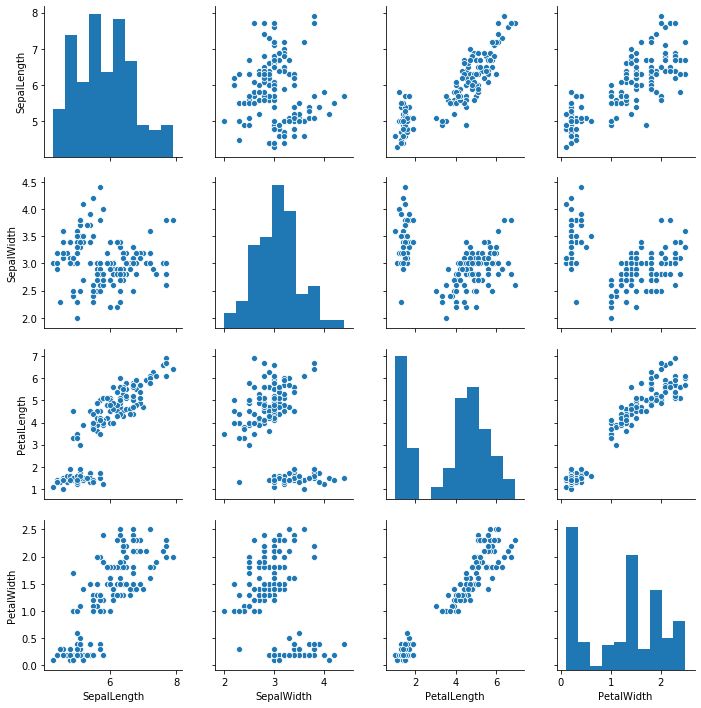

In [35]:
sns.pairplot(iris_df)

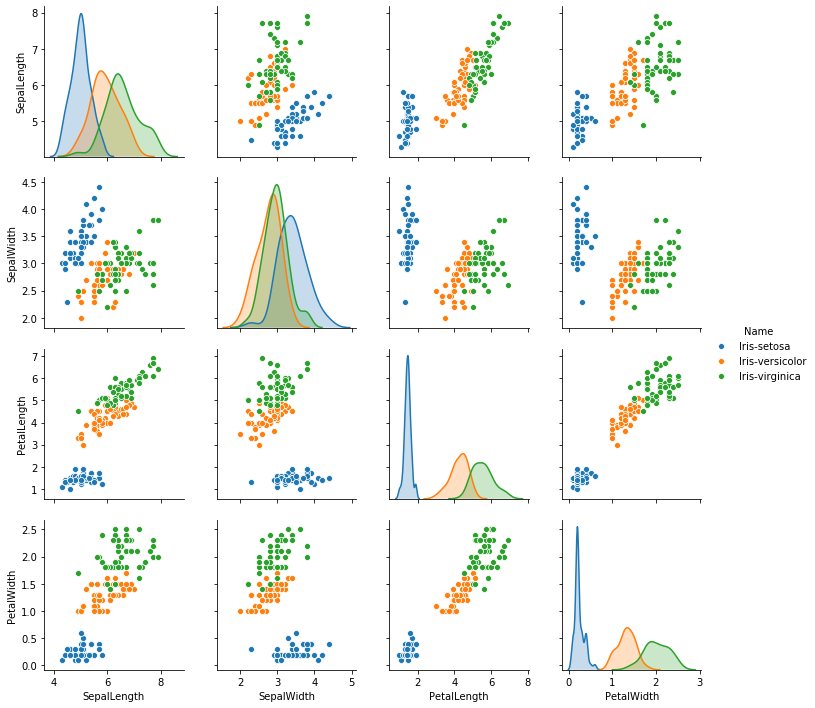

In [36]:
sns.pairplot(iris_df, hue="Name")

<span style="color:red">**Question 5a:** </span> If you are allowed to select only one attribute, which attribute would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

<span style="color:green">Answer:</span> Petalwidth attribute is highly useful for the clustering task. From the pair plot we can see the datapoints more distributed across the axis in petalwidth attribute. So this distribution is much more useful in clustering the data according to their class.

<span style="color:red">**Question 5b:** </span> If you are allowed to select only two features, which feature would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

<span style="color:green">Answer:</span> PetalLength and PetalWidth are the two features which would be useful for clustering task. In the plot we can see that they have positive covariance. The colorplots show that the 3 classes can be separated by clustering the data. So clustering would be much effective on these classes.

<span style="color:red">**Question 5c:** </span>In real-world problems ground-truth (types of iris plants) will not be available to select the features, how do you perform **feature selection** in that case? 

<span style="color:green">Answer:</span> We need to create the features using the Diemnsionality reduction. We first take the various possible features and project the data based on the principal components.

<span style="color:red">**Question 5d:** </span>In real-world problems ground-truth (types of iris plants) will not be available to select the features, how do you perform **dimensionality reduction** in that case? What limitations does your approach have?

<span style="color:green">Answer:</span> We select the features and perform the dimensionality reduction to get the best principal components. We might not get the best features while taking the features and missout on the good features of the data.

### 6. Dimensionality Reduction: PCA on Iris Data

<span style="color:red">**Question 6a:** </span> Perform PCA on Iris dataset and project the data onto the first two principal components. Use the attributes 'SepalLength','SepalWidth','PetalLength', and 'PetalWidth'. 

Hint: Use iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']] to use the specified attributes.

In [37]:
df = iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
cov_matrix = df.cov().values  #covariance matrix

In [38]:
w,v = np.linalg.eig(cov_matrix) #get eigen values and eigen vectors
print(v)

[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [39]:
np.matmul(v,  np.transpose(v))   #v * v(transpose)

array([[ 1.00000000e+00,  1.11022302e-16,  1.38777878e-16,
        -2.77555756e-16],
       [ 1.11022302e-16,  1.00000000e+00, -2.77555756e-17,
        -1.94289029e-16],
       [ 1.38777878e-16, -2.77555756e-17,  1.00000000e+00,
         2.22044605e-16],
       [-2.77555756e-16, -1.94289029e-16,  2.22044605e-16,
         1.00000000e+00]])

In [40]:
data_matrix = df.values    #get array of the dataframe
#print(data_matrix)
projected_data = np.matmul(data_matrix,v[:,0:2])    #get the projected array
print(projected_data)

[[ 2.82713597 -5.64133105]
 [ 2.79595248 -5.14516688]
 [ 2.62152356 -5.17737812]
 [ 2.7649059  -5.00359942]
 [ 2.78275012 -5.64864829]
 [ 3.23144574 -6.06250644]
 [ 2.69045242 -5.23261922]
 [ 2.8848611  -5.48512908]
 [ 2.62338453 -4.7439257 ]
 [ 2.83749841 -5.20803203]
 [ 3.00481631 -5.96665874]
 [ 2.89820038 -5.33624436]
 [ 2.72390912 -5.08698354]
 [ 2.28614265 -4.81144382]
 [ 2.86779988 -6.50091863]
 [ 3.12747377 -6.65947808]
 [ 2.88881689 -6.13281341]
 [ 2.86302037 -5.6338604 ]
 [ 3.31226514 -6.19396782]
 [ 2.92399691 -5.83519737]
 [ 3.2008114  -5.71259155]
 [ 2.96810819 -5.75475549]
 [ 2.2954854  -5.4563393 ]
 [ 3.20821456 -5.42024641]
 [ 3.15517201 -5.28351414]
 [ 3.00342587 -5.17566739]
 [ 3.0422871  -5.45261105]
 [ 2.94895215 -5.68940829]
 [ 2.87152183 -5.6340138 ]
 [ 2.87849519 -5.1246479 ]
 [ 2.92288105 -5.11733065]
 [ 3.10126576 -5.73280374]
 [ 2.86370642 -6.13470636]
 [ 2.91418362 -6.41474566]
 [ 2.83749841 -5.20803203]
 [ 2.64434325 -5.39191683]
 [ 2.88611463 -5.92152374]
 

In [41]:
projected_data.shape  #shape of the projected array

(150, 2)

In [42]:
proj_df = pd.DataFrame(projected_data, columns=['proj1','proj2'])
proj_df.head()

,proj1,proj2
0,2.827136,-5.641331
1,2.795952,-5.145167
2,2.621524,-5.177378
3,2.764906,-5.003599
4,2.782750,-5.648648


In [43]:
proj_df_l = pd.merge(proj_df,iris_df[['Name']],left_index=True, right_index=True)
proj_df_l

,proj1,proj2,Name
0,2.827136,-5.641331,Iris-setosa
1,2.795952,-5.145167,Iris-setosa
2,2.621524,-5.177378,Iris-setosa
3,2.764906,-5.003599,Iris-setosa
4,2.782750,-5.648648,Iris-setosa
5,3.231446,-6.062506,Iris-setosa
6,2.690452,-5.232619,Iris-setosa
7,2.884861,-5.485129,Iris-setosa
8,2.623385,-4.743926,Iris-setosa
9,2.837498,-5.208032,Iris-setosa


<span style="color:red">**Question 6b:** </span> Generate a pairplot (along with colors for the different types of iris plants) between the two newly generated features using PCA in the above step.

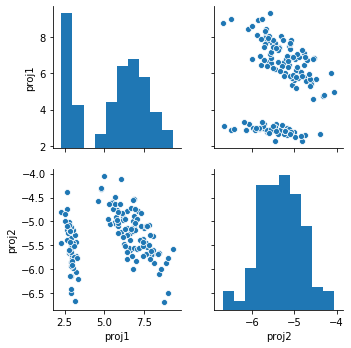

In [44]:
sns.pairplot(proj_df)

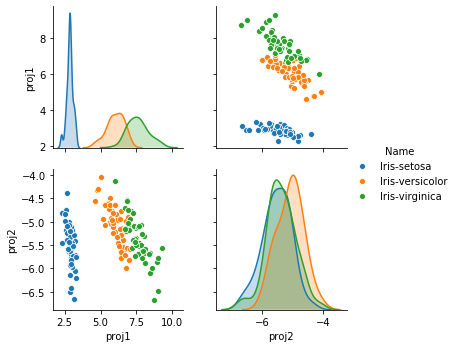

In [45]:
sns.pairplot(proj_df_l, hue='Name')

<span style="color:red">**Question 6c:** </span> From the above pairplot, if only one newly generated attribute were to be used for clustering the data which newly generated attribute is best suited. Provide a reason. Is the newly generated attribute better than the feature selected in Question 4a?

<span style="color:green">Answer:</span> Proj1: which is projection onto first principal direction is the attributeb which is useful for clustering the data. We can see from the plot that the labels are much more clearly separated in this attibute. Yes, it is better than the feature selected in Ques 4a.

<span style="color:red">**Question 6d:** </span> From the above pairplot, if two newly generated attributes were to be used for clustering the data, are the two newly generated attributes better than the features selected in Question 4b?

<span style="color:green">Answer:</span> Yes the newly generated data are much more better for clustering than the features in 4b.

### 7. Dimensionality Reduction: PCA on synthetic datasets

Consider the following synthetic dataset we refer to as **Blobs**. This dataset has 500 data points centered around (-5, -5), (0,0) and (5,5). This dataset has 1500 data points and 2 attributes.

In [46]:
n_samples = 1500
random_state = 42
centers = [(-5, -5), (0, 0), (5, 5)]
Blobs_X, Blobs_y = datasets.make_blobs(n_samples=n_samples,centers=centers,random_state=random_state)

In [47]:
Blobs_X.shape

(1500, 2)

Text(0.5, 1.0, 'Blobs')

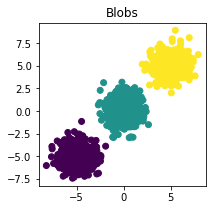

In [48]:
plt.figure(figsize=(3,3))
plt.scatter(Blobs_X[:, 0], Blobs_X[:, 1], c= Blobs_y)
plt.title('Blobs')


We generated a new dataset **Blobs1** by adding an extra attribute to this 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 1.

In [49]:
Blobs1= pd.DataFrame(Blobs_X)
Blobs1['2'] = np.random.randn(1500)
Blobs1.head()

,0,1,2
0,0.168461,1.317598,1.419900
1,-3.534351,-5.225776,-0.601500
2,-6.525525,-5.691908,-0.938578
3,-0.120948,0.419532,-0.591223
4,-5.469474,-4.457440,-1.808163


We generated a new dataset **Blobs2** by adding an extra attribute to the 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 100. Read more about how to do this at https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html.

In [50]:
Blobs2= pd.DataFrame(Blobs_X)
Blobs2['2'] = np.random.randn(1500)*10
Blobs2.head()

,0,1,2
0,0.168461,1.317598,8.678370
1,-3.534351,-5.225776,9.289202
2,-6.525525,-5.691908,3.930813
3,-0.120948,0.419532,15.699148
4,-5.469474,-4.457440,-0.891314


We generated a new dataset **Blobs3** by adding two extra attributes to the 2D Blobs dataset. The values for the two new attributes are drawn from a normal distribution with mean 0 and variance 100. 

In [51]:
Blobs3= pd.DataFrame(Blobs_X)
Blobs3['2'] = np.random.randn(1500)*10
Blobs3['3'] = np.random.randn(1500)*10
Blobs3.head()

,0,1,2,3
0,0.168461,1.317598,-0.400330,-4.991695
1,-3.534351,-5.225776,7.337391,11.417113
2,-6.525525,-5.691908,5.548518,-5.375661
3,-0.120948,0.419532,22.919380,7.640299
4,-5.469474,-4.457440,3.657868,-10.967058


<span style="color:red">**Question 7a:** </span> Plot pairplot for **Blobs1** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

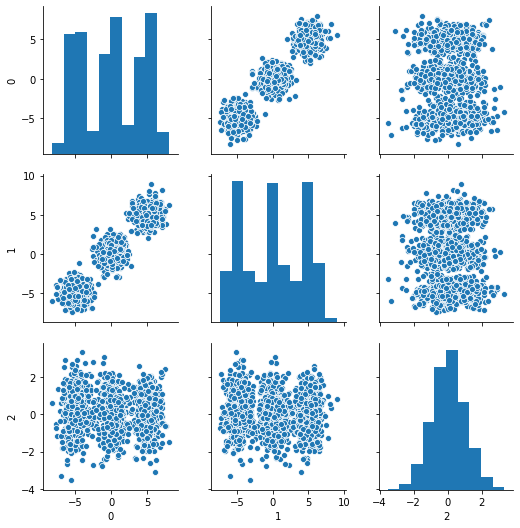

In [52]:
sns.pairplot(Blobs1)

<span style="color:green">Answer:</span> The third attribute is normally distributed compared to other two attributes. We a highest peak value at mean point. But the other two attributes have multiple peak points.

<span style="color:red">**Question 7b:** </span> Perform PCA on **Blobs1** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [53]:
cov_matrix = Blobs1.cov().values  #covariance matrix
w,v = np.linalg.eig(cov_matrix) #get eigen values and eigen vectors
print("Eigen values are:",w)

Eigen values are: [34.25623592  0.95499718  0.98520899]


In [54]:
blobs1_matrix = Blobs1.values    #get array of the dataframe
#print(blobs1_matrix)
projected_data = np.matmul(blobs1_matrix,v[:,0:2])    #get the projected array
proj_df = pd.DataFrame(projected_data, columns=['proj1','proj2'])
proj_df.head()

,proj1,proj2
0,-1.047038,0.365554
1,6.193646,-0.958891
2,8.635267,0.852682
3,-0.213480,0.536282
4,7.012653,1.221495


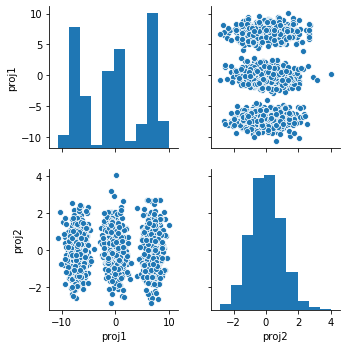

In [55]:
sns.pairplot(proj_df)

<span style="color:red">**Question 7c:** </span> By comparing the distributions for the newly generated attributes in Question 7b with the previous pairplot in Question 7a, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Provide a reason for your observations.

<span style="color:green">Answer:</span> By comparing the pairplots we can clearly see that projection1 and attribute 1,2 have similar variance. The plot clearly shows that first pricipal component catches attribute 1, 2 and second principle component captures attribute 3. And also variance of attribute 1, 2 is in range of -10 to 10 which is similar to first principal component. Similarly, variance of the second principle component is in range of -4 to 4 which is same as attribute 3.

<span style="color:red">**Question 7d:** </span> Plot pairplot for **Blobs2** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

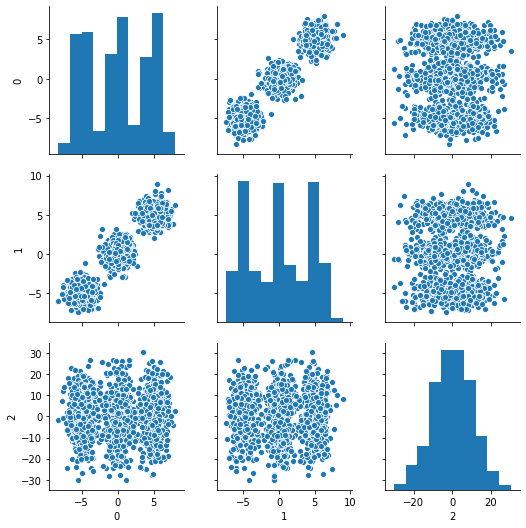

In [56]:
sns.pairplot(Blobs2)

<span style="color:green">Answer:</span> The variance of attribute 3 is greater than attributes 1 and 2. 

<span style="color:red">**Question 7e:** </span> Perform PCA on **Blobs2** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [57]:
cov_matrix2 = Blobs2.cov().values  #covariance matrix
w2,v2 = np.linalg.eig(cov_matrix2) #get eigen values and eigen vectors
print("Eigen values are:",w2)

Eigen values are: [  0.95646868  34.24698153 104.9259478 ]


In [58]:
blobs2_matrix = Blobs2.values    #get array of the dataframe
#print(blobs1_matrix)
projected_data2 = np.matmul(blobs2_matrix,v2[:,0:2])    #get the projected array
proj_df2 = pd.DataFrame(projected_data2, columns=['proj1','proj2'])
proj_df2.head()

,proj1,proj2
0,0.838924,0.954338
1,-1.159250,-6.299617
2,0.612030,-8.681876
3,0.431843,0.035427
4,0.720968,-7.008080


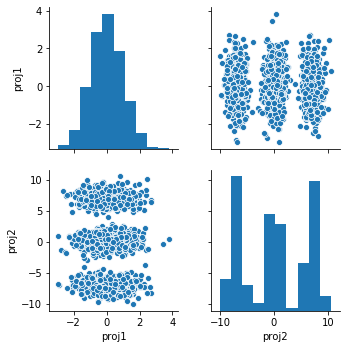

In [59]:
sns.pairplot(proj_df2)

<span style="color:red">**Question 7f:** </span> By comparing the distributions for the newly generated attributes in Question 7e with the previous pairplot in Question 7d, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7c)?

<span style="color:green">Answer:</span> First principal component captured attribute 2. Second principal component captured attributes 0 and 1. It is beacuse the attribute 2 is drawn from distribution of variance 1 in 7d but variance is 100 when used in 7e. So there is difference.

<span style="color:red">**Question 7g:** </span> Are the three blobs separately visible after projection based on PCA in Question 7e?

<span style="color:green">Answer:</span> Yes. the blobs are clearly separated in the 7f when compared to 7e.

<span style="color:red">**Question 7h:** </span> Plot pairplot for **Blobs3** data. By visually examining this plot, comment on the strength of the correlation between the first two attributes. Also, comment on the strength of the correlation between the second two attributes.

In [60]:
Blobs3.corr()

,0,1,2,3
0,1.000000,0.945616,0.027502,-0.009368
1,0.945616,1.000000,0.032204,-0.009782
2,0.027502,0.032204,1.000000,0.003735
3,-0.009368,-0.009782,0.003735,1.000000


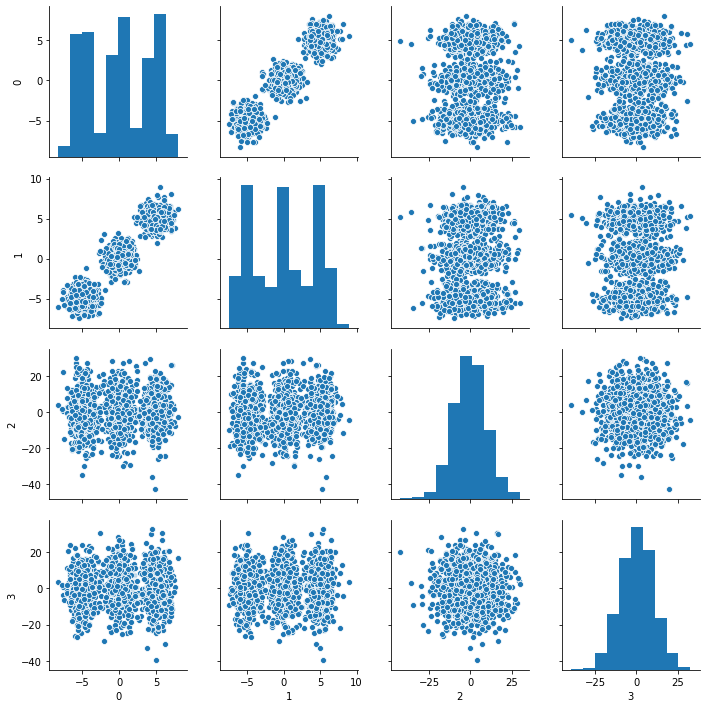

In [61]:
sns.pairplot(Blobs3)

<span style="color:green">Answer:</span> The attributes 0 and 1 are strongly correlated. The attributes 2 and 3 are weakly correlated.

<span style="color:red">**Question 7i:** </span> Perform PCA on **Blobs3** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [62]:
pca = PCA(2)  # project from 4 to 2 dimensions
projected = pca.fit_transform(Blobs3.values)
print(Blobs3.values.shape)
print(projected.shape)

(1500, 4)
(1500, 2)


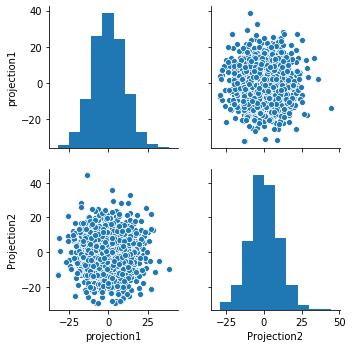

In [63]:
pca_projected = pd.DataFrame(projected, columns =["projection1","Projection2"])
sns.pairplot(pca_projected)

<span style="color:red">**Question 7j:** </span>  By comparing the distributions for the newly generated attributes in Question 7i with the previous pairplot in Question 7h, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7f and 7c)?

<span style="color:green">Answer:</span> Attributes 2 and 3 are captured by the first and the second principal component. The attributes with high variance are being caputed in the first principal component so, the attributes 2,3 which have variance 100 are in the first component. 

<span style="color:red">**Question 7k:** </span>  Are the three blobs separately visible after projection based on PCA in Question 7i? What would have caused this, in comparison to your observation in Question 7g?

<span style="color:green">Answer:</span> Yes, the blobs are clearly visible after the projection based on PCA. It is due to the projection on the principal component. 

<span style="color:red">**Question 7l:** </span>  What limitation of PCA do your observations in Questions 7j, 7f, and 7c highlight?

<span style="color:green">Answer:</span> PCA is focused on finding orthogonal projections of the dataset that contains the highest variance possible in order to 'find hidden LINEAR correlations' between variables of the dataset. This means that if you have some of the variables in your dataset that are linearly correlated, PCA can find directions that represents your data in that direction only. In PCA we cant classify the data based on the classes. So we nee to do another method which can take classes into consideration.

### 8. Singular Value Decomposition

<span style="color:red">**Question 8a:** </span> Using the code provided in the practice notebook for computing PCA, write your own SVD function (U,S,V = mysvd(A)) to factorize the matrix A into U,S, and V.

In [83]:
from numpy.linalg import eig
from numpy import matmul


def mysvd(A):
    U=matmul(A,np.transpose(A))
    V=matmul(np.transpose(A),A)
    eig_u,eig_vect_u=eig(U)
    eig_v,eig_vect_v=eig(V)
    (x,y)=np.shape(A)
    eig_u[eig_u<0]=0
    s=np.sqrt(eig_u)
    diagonal_matrix=np.empty([x,y])
    for i in range(0,x):
        for j in range(0,y):
            if i==j:
                diagonal_matrix[i,j]=s[i]
            else :
                diagonal_matrix[i,j]=0
    return(eig_vect_u,diagonal_matrix,eig_vect_v)

In [82]:
def mysvd2(A):  #A is a dataframe
    data = A.values
    cov_matrix = np.cov(data)  #covariance matrix
    w,v = np.linalg.eig(cov_matrix) #get eigen values and eigen vectors of V
    u_matrix = np.matmul(data,  np.transpose(data))
    cov_matrix2 = np.cov(u_matrix)  #covariance matrix
    d,u = np.linalg.eig(cov_matrix2) #get eigen values and eigen vectors of U=X.Xt
    s = np.diag(w)
    #print(d.shape)
    return u,s,v

U,S,V = mysvd(Blobs1)

<span style="color:red">**Question 8b:** </span> Demonstrate that your code is correct by using your function on the following matrix $A$ and showing that the product $USV^T=A$.

In [84]:
A = np.array([
    [1, 1, 1, 0, 0, 0],
    [3, 3, 3, 0, 0, 0],
    [4, 4, 4, 0, 0, 0],
    [5, 5, 5, 0, 0, 0],
    [0, 1, 0, 4, 4, 1],
    [0, 0, 0, 5, 5, 2],
    [0, 0, 0, 2, 2, 2]])

In [85]:
Ax = pd.DataFrame(A)
U,S,V = mysvd(A)
B = (np.matmul(np.matmul(U,S), np.transpose(V)))
print(B)

[[-0.98763913 -1.00367369 -0.98763903 -0.14056221 -0.14056221 -0.04755794]
 [-2.9629172  -3.01102106 -2.96291728 -0.42168662 -0.42168665 -0.14267381]
 [-3.95055634 -4.01469474 -3.9505563  -0.56224886 -0.56224882 -0.19023175]
 [-4.9381954  -5.01836843 -4.9381954  -0.70281105 -0.70281106 -0.23778968]
 [-0.8177649  -0.5401995  -0.8177649   3.98468166  3.98468166  0.78442958]
 [-0.76330776  0.02587753 -0.76330776  4.89878606  4.89878606  2.19950977]
 [-0.04053717 -0.57629037 -0.04053717  2.02893143  2.02893143  1.85242473]]


<span style="color:red">**Question 8c:**</span> Perform SVD on iris dataset and visualize the proportion of variance captured by each spectral value. List the dimensions that captures less than 10% of the total variance.

In [86]:
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


In [87]:
data = iris_df.values[:,0:4]
data = data.astype(float) #converts data format from object to numeric

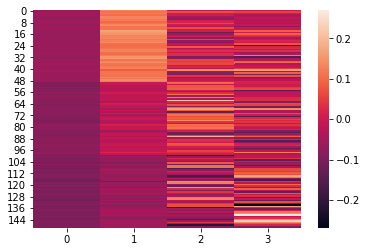

In [88]:
U, S, V = svd(data, full_matrices = False)
sns.heatmap(U)

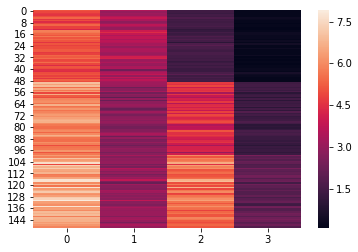

In [89]:
sns.heatmap(np.matmul(np.matmul(U,np.diag(S)), V))

Text(0.5, 1.0, 'Percent of variance captured')

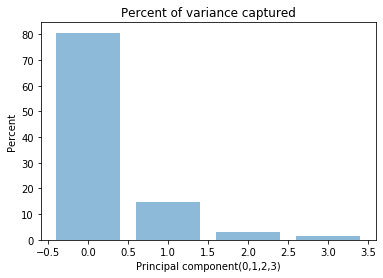

In [90]:
y = []
for i in S:
    y.append(i/np.sum(S)*100)

x = [0,1,2,3]
plt.bar(x, y, align='center', alpha=0.5)
#plt.xticks(x,y)
plt.xlabel('Principal component(0,1,2,3)')
plt.ylabel('Percent')
plt.title('Percent of variance captured')


In [91]:
for i in S:
    if i/np.sum(S)<0.1:
        print("variance less than 10% in dimension:", np.where(S == i))

variance less than 10% in dimension: (array([2], dtype=int64),)
variance less than 10% in dimension: (array([3], dtype=int64),)


<span style="color:green">Answer:</span> Dimension 2 and 3 (If 0,1,2,3 are dimensions)

<span style="color:red">**Question 8d:**</span> The heatmap of the full data is shown below. Plot all the four spectral decomposition matrices based on SVD.

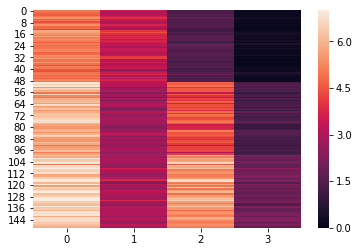

In [92]:
sns.heatmap(data,vmin=0, vmax=7)

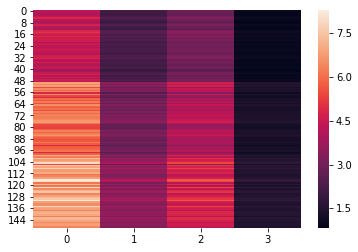

In [93]:
sns.heatmap(S[0]*np.outer(U[:,0],V[0,:]))

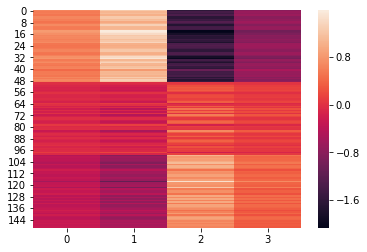

In [94]:
sns.heatmap(S[1]*np.outer(U[:,1],V[1,:]))

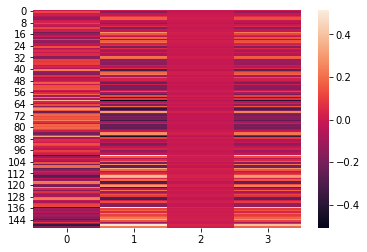

In [95]:
sns.heatmap(S[2]*np.outer(U[:,2],V[2,:]))

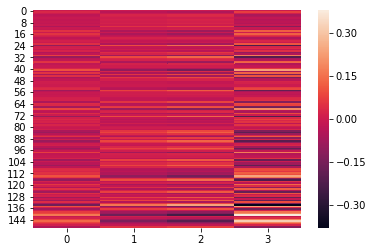

In [96]:
sns.heatmap(S[3]*np.outer(U[:,3],V[3,:]))

<span style="color:red">**Question 8e:**</span> Visually examine the magnitude of values present in each of the four spectral decomposition matrices and comment on which two of the four matrices have elements with relatively small magnitude in them. Provide a reason for this based on your obsevation in Question 8c. 

<span style="color:green">Answer:</span> The matrices 2 and 3 have the small magnitude in them. the magnitude is less in the spectral decomposition where the variance is low. In this case variance is less than 10 % in these components, so the matrices 2 and 3 have less magnitude.

### 9. Linear Discriminant Analysis

We will use digits data for studying the use of LDA.

In [97]:
digits = load_digits()

The data with 1797 samples and 64 attributes is in the object digits.data. These 64 attributes represent pixels in an 8x8 image.

In [98]:
digits.data.shape

(1797, 64)

The 1797 images are digits from 0...9. This information is in the digits.target variable.

In [99]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

For this part, we will only focus on digits 3 and 8. To this end, we generate indices of 183 samples with 3s and indices of 174 samples with 8s.

In [100]:
Threes = np.where(digits.target==3)
Eights = np.where(digits.target==8)
[np.size(Threes), np.size(Eights)]

[183, 174]

We will take samples from these indices and construct a matrix X such that the first 183 samples represent 3s and the remaining ones represent 8s. The variable y captures this information.

In [101]:
indices = np.hstack((Threes[0], Eights[0]));
X = digits.data[indices,:]
y = np.hstack((3*np.ones(np.size(Threes)), 8*np.ones(np.size(Eights))))

In [102]:
X

array([[ 0.,  0.,  7., ...,  9.,  0.,  0.],
       [ 0.,  2.,  9., ..., 11.,  0.,  0.],
       [ 0.,  1.,  8., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [103]:
X.shape

(357, 64)

In [104]:
y

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8.

In [105]:
y.shape

(357,)

<span style="color:red">**Question 9a:**</span> Visually examine the following heatmap of the data X and identify one attribute that can separate the 3s from 8s. Also comment on (approximately) how many mistakes would be committed if this attribute is used for projection in LDA.

[Text(159.0, 0.5, 'Samples'), Text(0.5, 69.0, 'Attributes')]

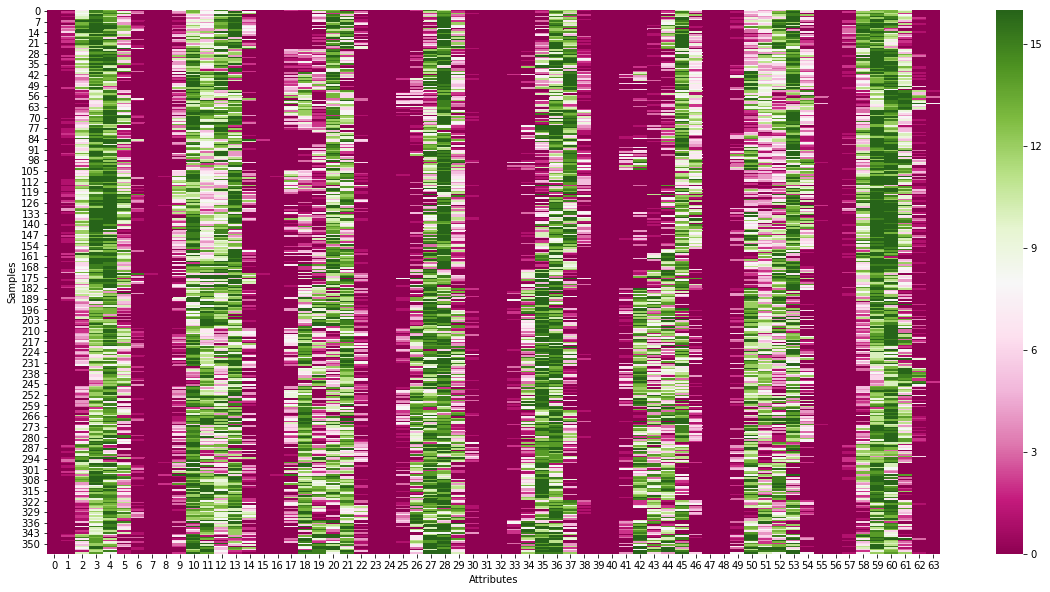

In [106]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')


<span style="color:green">Answer:</span> I think attribute 35 can separate the 3s and 8s. Approximately 20 to 30 mistakes would be commited if tis attribute is taken for PCA.

<span style="color:red">**Question 9b:**</span> Perform LDA on this data. Plot the heatmap of the projected data and comment how many points will be wrongly predicted based on this projection.

In [109]:
lda = LinearDiscriminantAnalysis()
X_r1 = lda.fit(X[:,35:36], y).transform(X[:,35:36])
X_r2 = lda.fit(X[:,18:19], y).transform(X[:,18:19])

[Text(159.0, 0.5, 'Samples'), Text(0.5, 69.0, 'Attributes')]

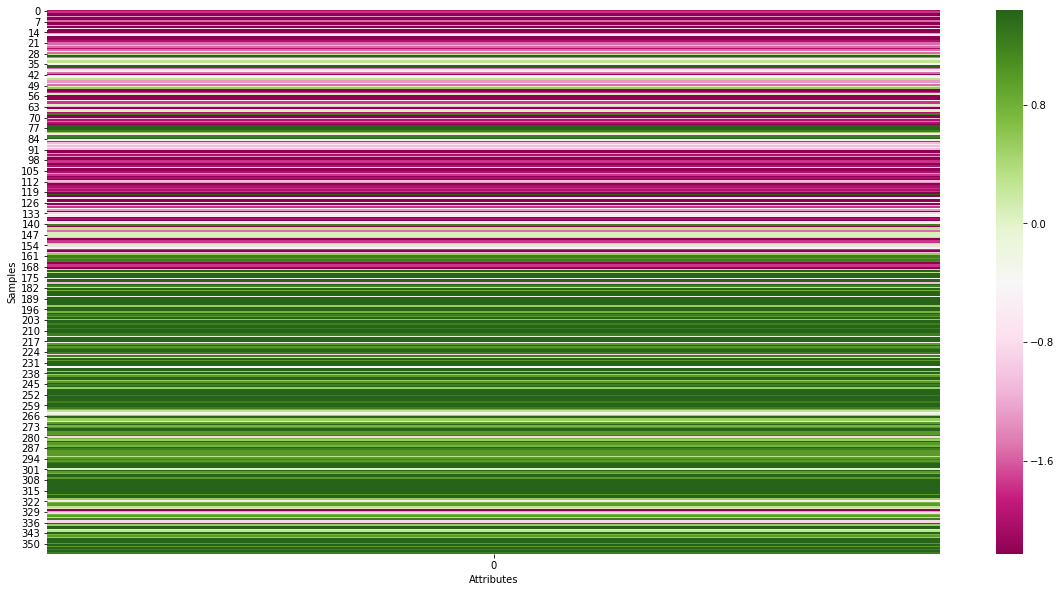

In [110]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X_r1,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')

<span style="color:green">Answer:</span> Approximately 15 to 25 points will be wrongly predicted.